# Tensorflow Tutorial on Using CNN to Train MNIST Dataset

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Load MNIST dataset downloaded from http://yann.lecun.com/exdb/mnist/
- the data file is idx file format
- Don't bother to learn what the format is, use the functions we create to tranform data into numpy arrays
- However, be sure to understand the content of numpy arrays

### Understand the content of loaded image
- We have two set of data: train set with 60000 images, test set with 100000 images
- the image size is 28 x 28, the numerical range is **normalized** to [0, 255]
- the labels are intergers from 0 to 9

Loaded of train set has an array of shape (60000, 28, 28) for images, (60000, 1) for labels
Loaded of test set has an array of shape (10000, 28, 28)  for images, (10000, 1) for labels
The values of 10th label in train set: [3.]
The values of 10th image in train set:
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  42. 118. 219. 166. 118. 118.   6.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  

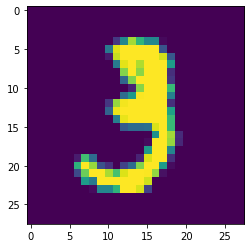

In [24]:
def extract_image(file):
    """Extract the (normalized) image from the idx file"""
    with open(file, "rb") as stream:
        stream.read(4) # header
        n_images = int.from_bytes(stream.read(4), byteorder="big")
        n_row = int.from_bytes(stream.read(4), byteorder="big")
        n_col = int.from_bytes(stream.read(4), byteorder="big")
        buf = stream.read(n_row * n_col * n_images)
        data = np.frombuffer(buf, np.uint8).astype(np.float32)
        data = data.reshape(n_images, n_row, n_col)
        return data


def extract_label(file):
    """Extract the label from the idx file"""
    with open(file, "rb") as stream:
        stream.read(4) # header
        n_labels = int.from_bytes(stream.read(4), byteorder="big")
        buf = stream.read(n_labels)
        data = np.frombuffer(buf, np.uint8).astype(np.float32)
        data = data.reshape(n_labels, 1)
        return data
    

train_images, train_labels = extract_image("./data/train-images.idx3-ubyte"), extract_label("./data/train-labels.idx1-ubyte")
test_images, test_labels = extract_image("./data/t10k-images.idx3-ubyte"), extract_label("./data/t10k-labels.idx1-ubyte")

print(f"Loaded of train set has an array of shape {train_images.shape} for images, {train_labels.shape} for labels")
print(f"Loaded of test set has an array of shape {test_images.shape}  for images, {test_labels.shape} for labels")

np.set_printoptions(precision=2, suppress=True, linewidth=150, threshold=np.inf)

print(f"The values of 10th label in train set: {train_labels[10, ...]}")
print(f"The values of 10th image in train set:")
print(train_images[10, ...])

%matplotlib inline
print("Display the image")
plt.imshow(train_images[10, ...])